# Preamble

importing

In [93]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs


# Seperate Data

Making test data

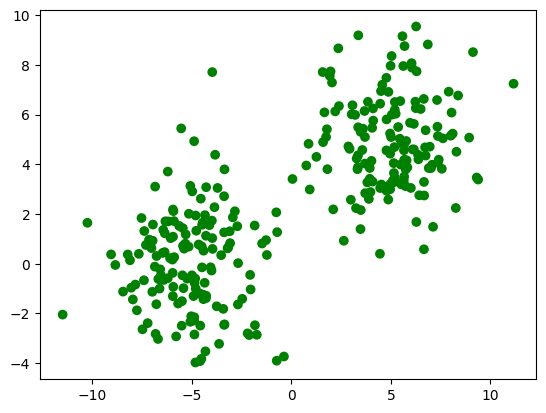

In [94]:
centers_full=[[-5, 0], [5, 5], [5, -5]]
colors_full = ["green", "yellow", "magenta"]
blobs = make_blobs(centers=centers_full[:2], cluster_std= 2, n_samples=300, random_state=42)

X, y = blobs

colors = ListedColormap(colors_full[:2])

plt.scatter(X[:, 0], X[:, 1], c=np.zeros(len(y)), cmap=colors)

## k-Means

Creating and fitting KMeans on the data.

In [95]:
from sklearn.cluster import KMeans

cluster = KMeans(random_state=42, n_clusters=2, n_init=10)
cluster.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=42)

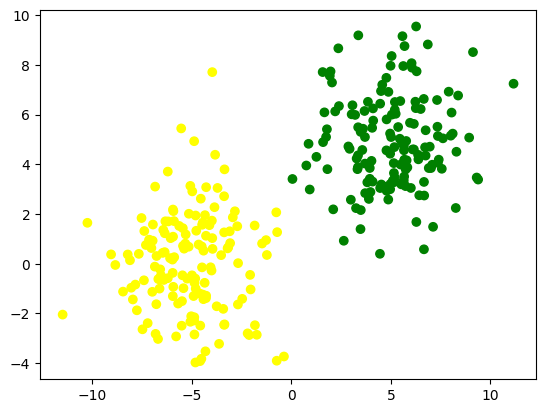

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=cluster.predict(X), cmap=colors)

Text(0, 0.5, 'Cost')

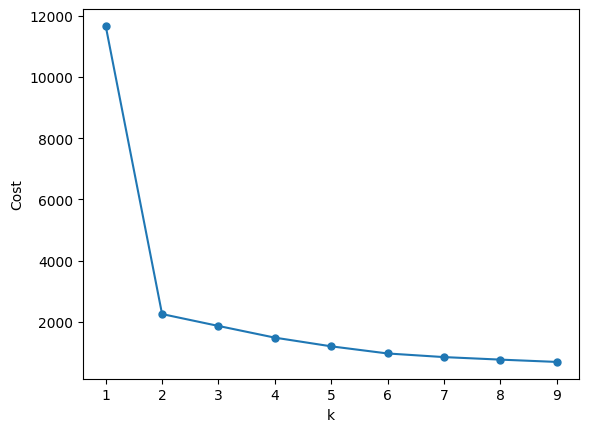

In [97]:
costs = []
ks = range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    costs.append(kmeans.inertia_)
plt.plot(ks,costs,'.-', markersize=10)
plt.xlabel('k')
plt.ylabel('Cost')


## Agglomerative Clustering

Text(0, 0.5, 'Distance')

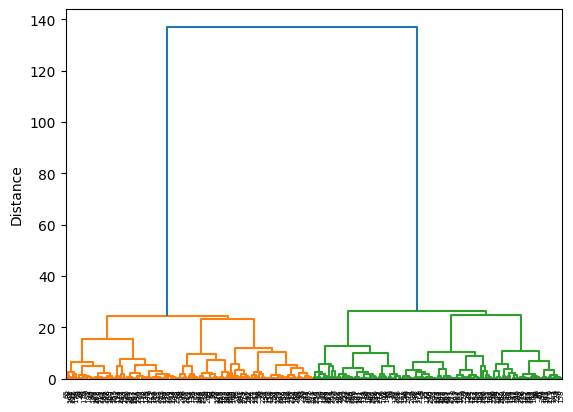

In [98]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X) #compute distances using Ward's method
dendrogram(linkage_array)
plt.ylabel('Distance')


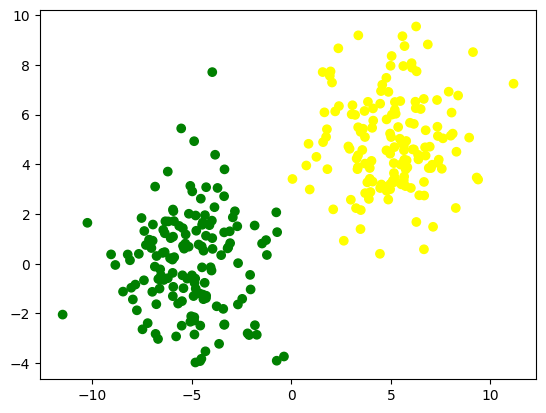

In [99]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(linkage='ward')
y_prime = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_prime, cmap=colors)

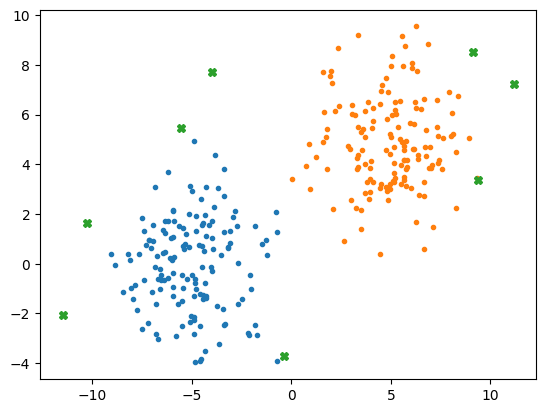

In [100]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=4)
y_prime = dbscan.fit_predict(X)
for i in range(y_prime.max() + 1) :
    plt.plot(X[y_prime == i, 0], X[y_prime == i, 1], '.', label=i)
plt.plot(X[y_prime == -1, 0], X[y_prime == -1, 1], 'X')


# Less Defined Clusters

Let's see how this works in a less separated data set

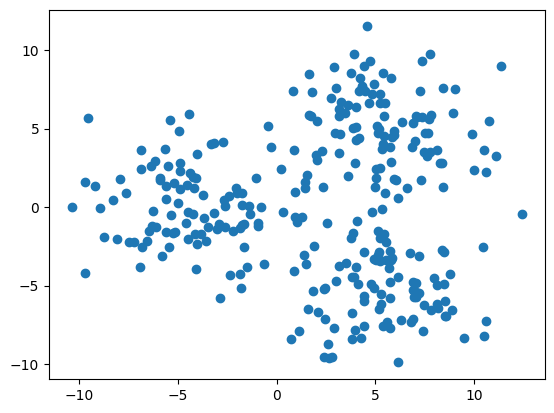

In [101]:
blobs = make_blobs(centers=centers_full, cluster_std=2.5, n_samples=300, random_state=504)

X, y = blobs

plt.scatter(X[:, 0], X[:, 1])

## k-Means

Creating and fitting KMeans on the data.

In [102]:
from sklearn.cluster import KMeans

cluster = KMeans(random_state=42, n_clusters=3, n_init=10)
cluster.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

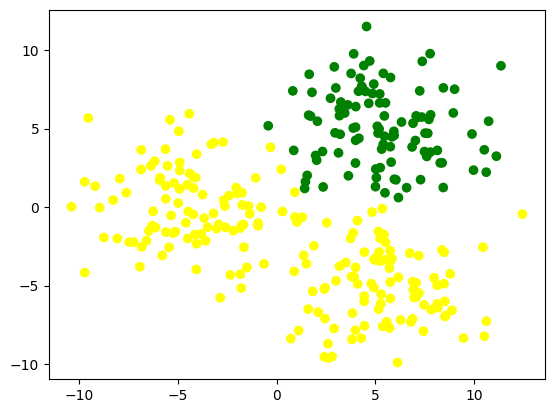

In [103]:
plt.scatter(X[:, 0], X[:, 1], c=cluster.predict(X), cmap=colors)

Text(0, 0.5, 'Cost')

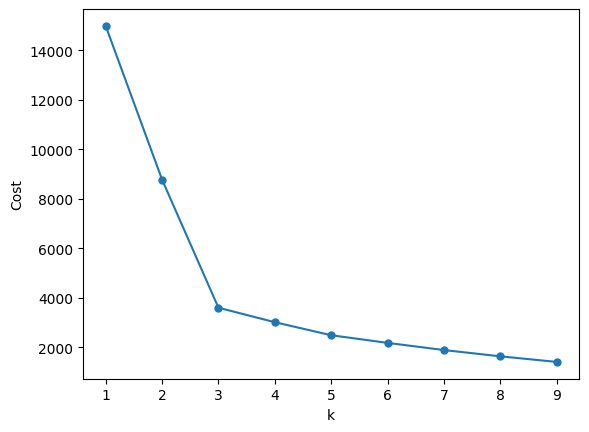

In [104]:
costs = []
ks = range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    costs.append(kmeans.inertia_)
plt.plot(ks,costs,'.-', markersize=10)
plt.xlabel('k')
plt.ylabel('Cost')


## Agglomerative Clustering

Text(0, 0.5, 'Distance')

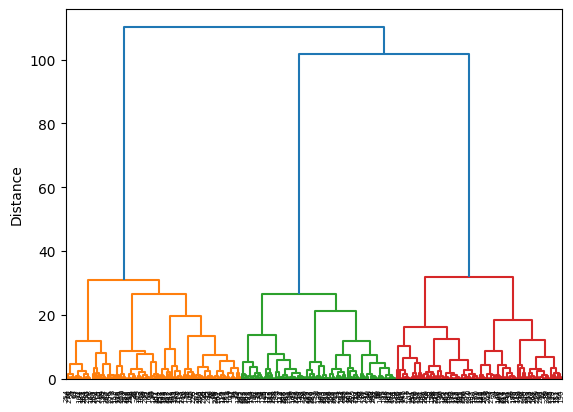

In [105]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X) #compute distances using Ward's method
dendrogram(linkage_array)
plt.ylabel('Distance')


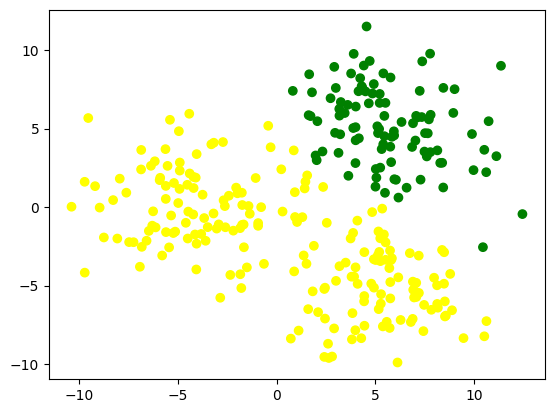

In [106]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(linkage='ward', distance_threshold=40, n_clusters=None)
y_prime = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_prime, cmap=colors)

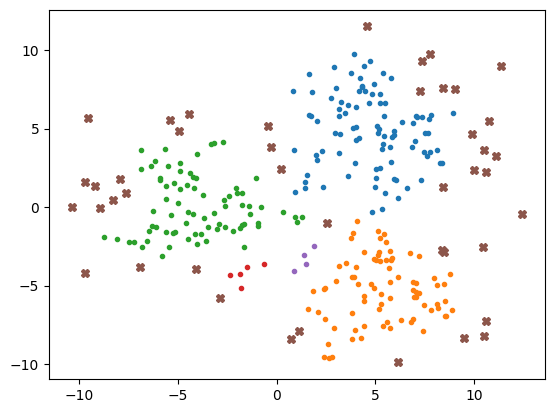

In [107]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=4)
y_prime = dbscan.fit_predict(X)
for i in range(y_prime.max() + 1) :
    plt.plot(X[y_prime == i, 0], X[y_prime == i, 1], '.', label=i)
plt.plot(X[y_prime == -1, 0], X[y_prime == -1, 1], 'X')


# Non-linear data

First some datasets.

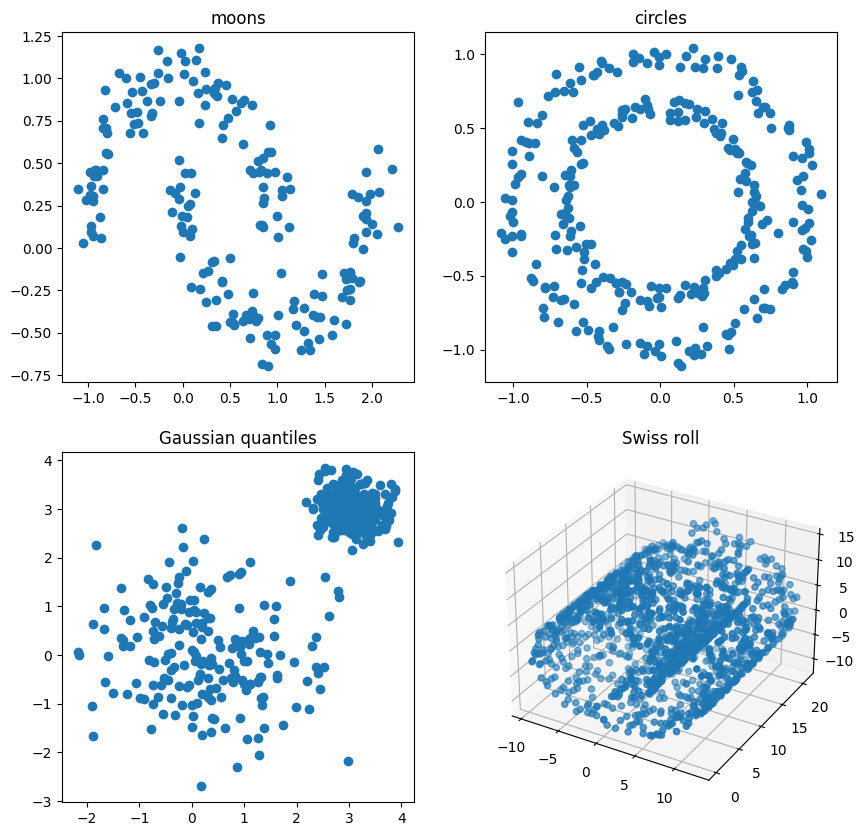

In [108]:
from sklearn.datasets import make_moons, make_circles, make_gaussian_quantiles, make_swiss_roll
from math import floor, ceil
import mpl_toolkits.mplot3d.axes3d as p3

colors = ListedColormap(['green', 'magenta', 'yellow', 'blue'])

X_moons, y_moons = make_moons(n_samples=200, noise = .1, random_state = 504)
X_circles, y_circles = make_circles(n_samples=300, factor=.65, noise = .05)
X1, y1 = make_gaussian_quantiles(cov=1,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=504)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=.1,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=504)
X_quan = np.concatenate((X1, X2))

X_swiss, y_swiss = make_swiss_roll(n_samples = 1500, noise = 0.05, random_state=504)

figure = plt.figure(figsize=(10, 10))

ax = figure.add_subplot(2, 2, 1, title='moons')
ax.scatter(X_moons[:, 0], X_moons[:, 1])

ax = figure.add_subplot(2, 2, 2, title='circles')
ax.scatter(X_circles[:, 0], X_circles[:, 1])

ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
ax.scatter(X_quan[:, 0], X_quan[:, 1])

ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2])


## kMeans

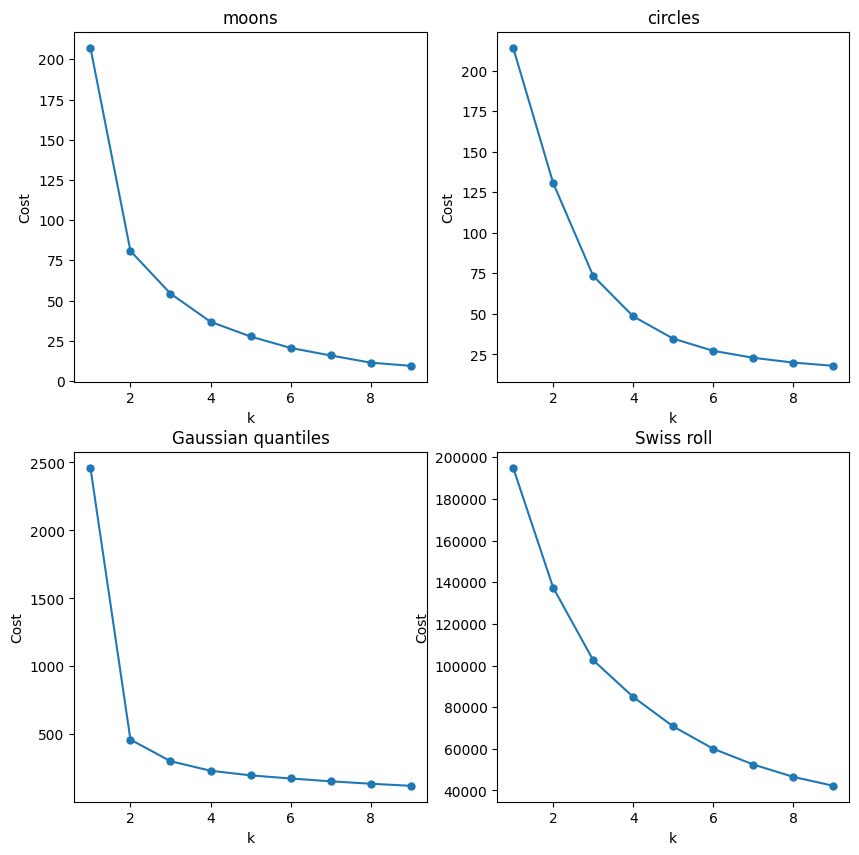

In [109]:
def dendogram(X, ax):
    costs = []
    ks = range(1,10)
    for k in ks:
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(X)
        costs.append(kmeans.inertia_)
    ax.plot(ks,costs,'.-', markersize=10)
    ax.set_xlabel('k')
    ax.set_ylabel('Cost')

figure = plt.figure(figsize=(10, 10))

ax = figure.add_subplot(2, 2, 1, title='moons')
dendogram(X_moons, ax)

ax = figure.add_subplot(2, 2, 2, title='circles')
dendogram(X_circles, ax)

ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
dendogram(X_quan, ax)

ax = figure.add_subplot(2, 2, 4, title='Swiss roll')
dendogram(X_swiss, ax)


c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kme

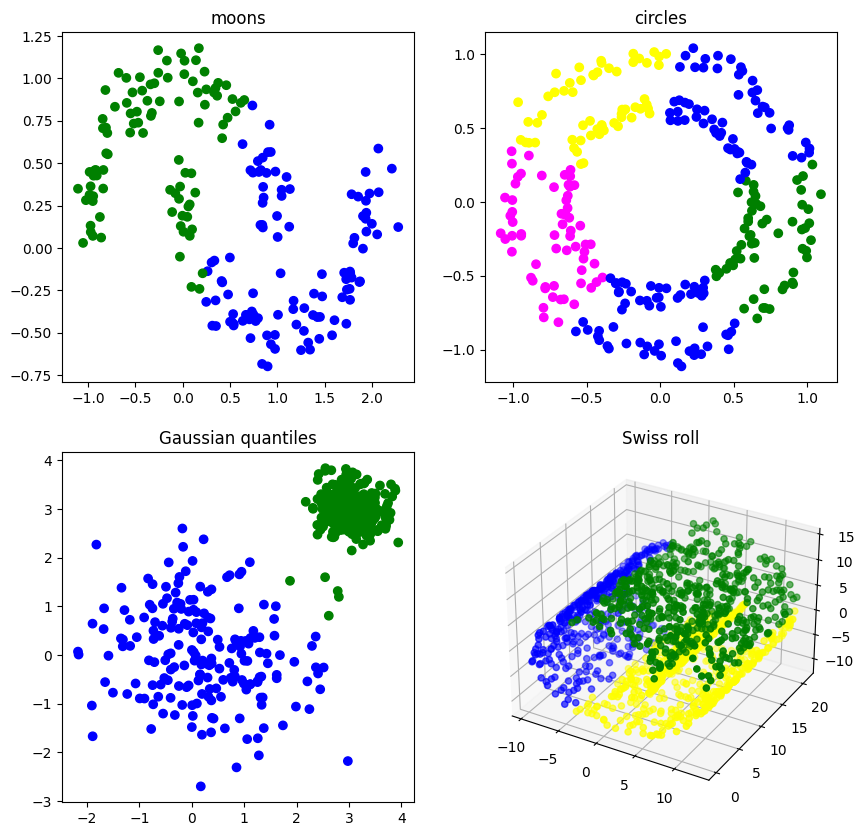

In [110]:
figure = plt.figure(figsize=(10, 10))

cluster = KMeans(n_clusters=2)
cluster.fit(X_moons)
ax = figure.add_subplot(2, 2, 1, title='moons')
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=cluster.predict(X_moons), cmap=colors)

cluster = KMeans(n_clusters=5)
cluster.fit(X_circles)
ax = figure.add_subplot(2, 2, 2, title='circles')
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=cluster.predict(X_circles), cmap=colors)

cluster = KMeans(n_clusters=2)
cluster.fit(X_quan)
ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
ax.scatter(X_quan[:, 0], X_quan[:, 1], c=cluster.predict(X_quan), cmap=colors)

cluster = KMeans(n_clusters=3)
cluster.fit(X_swiss)
ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=cluster.predict(X_swiss), cmap=colors)


## Agglomerative Clustering

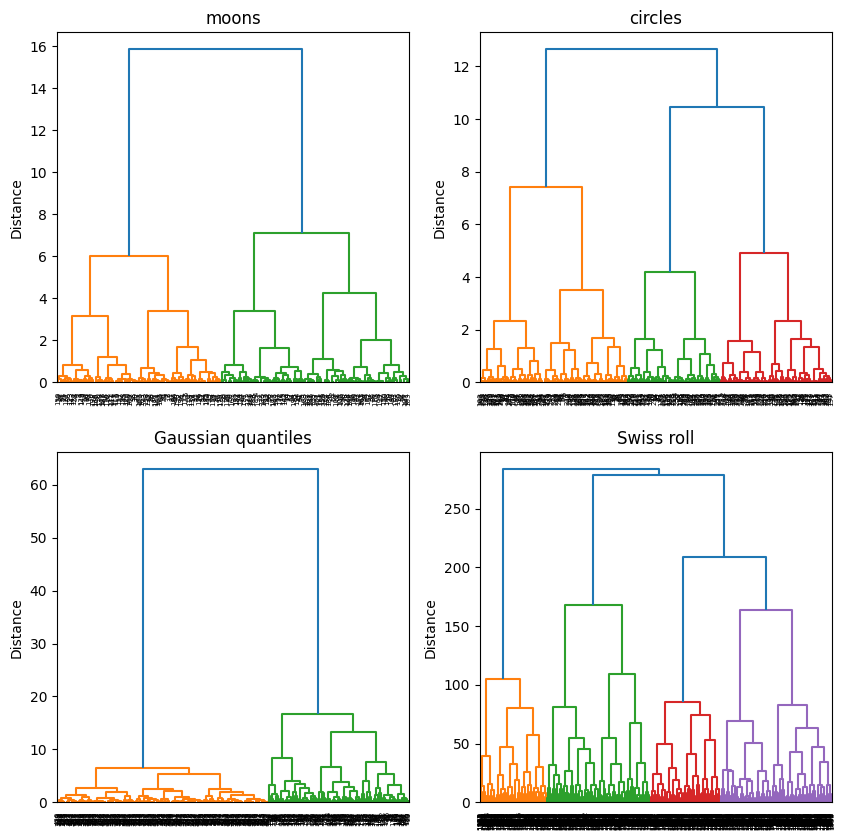

In [111]:
def dendogram(X, ax):
    linkage_array = ward(X) #compute distances using Ward's method
    dendrogram(linkage_array, ax=ax)
    ax.set_ylabel('Distance')

figure = plt.figure(figsize=(10, 10))

ax = figure.add_subplot(2, 2, 1, title='moons')
dendogram(X_moons, ax)

ax = figure.add_subplot(2, 2, 2, title='circles')
dendogram(X_circles, ax)

ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
dendogram(X_quan, ax)

ax = figure.add_subplot(2, 2, 4, title='Swiss roll')
dendogram(X_swiss, ax)


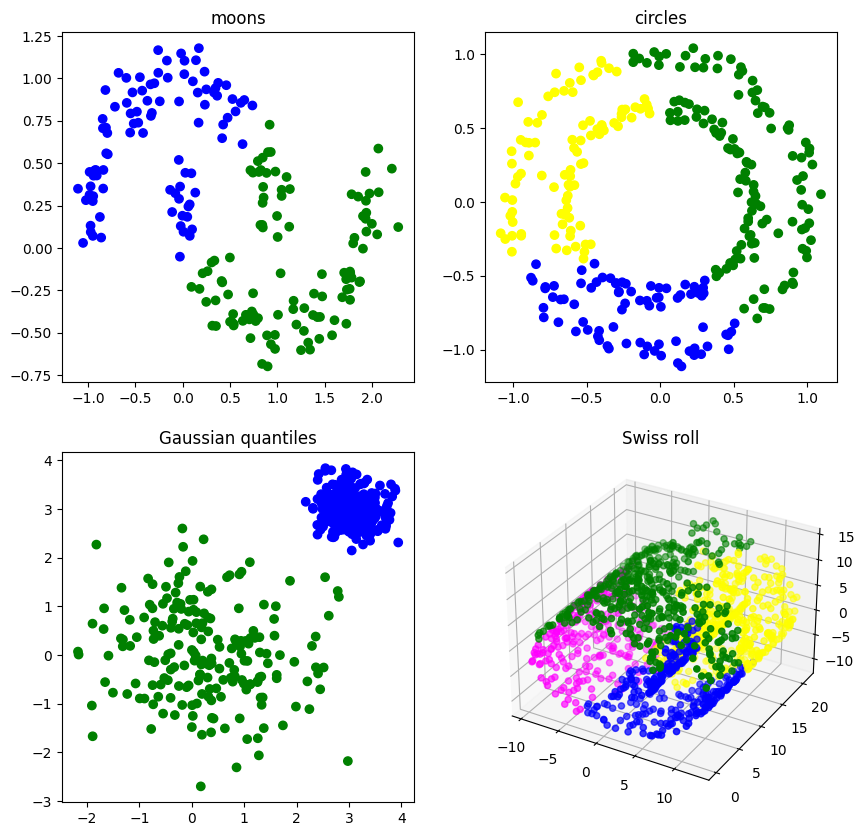

In [112]:
figure = plt.figure(figsize=(10, 10))

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=10)
y_prime = cluster.fit_predict(X_moons)
ax = figure.add_subplot(2, 2, 1, title='moons')
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_prime, cmap=colors)

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=10)
y_prime = cluster.fit_predict(X_circles)
ax = figure.add_subplot(2, 2, 2, title='circles')
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_prime, cmap=colors)

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=20)
y_prime = cluster.fit_predict(X_quan)
ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
ax.scatter(X_quan[:, 0], X_quan[:, 1], c=y_prime, cmap=colors)

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=200)
y_prime = cluster.fit_predict(X_swiss)
ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=y_prime, cmap=colors)


## DBSCAN

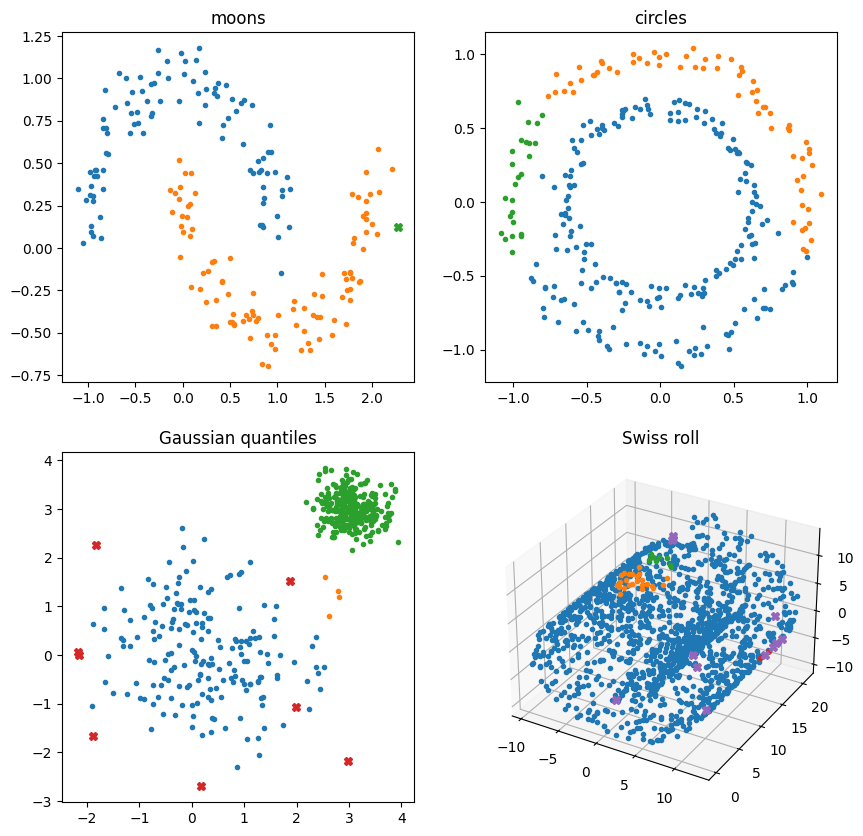

In [144]:

def plot_dbscan(X, dbscan, ax):
    y_prime = dbscan.fit_predict(X)
    for i in range(y_prime.max() + 1) :
        ax.plot(X[y_prime == i, 0], X[y_prime == i, 1], '.', label=i)
    ax.plot(X[y_prime == -1, 0], X[y_prime == -1, 1], 'X')


figure = plt.figure(figsize=(10, 10))

cluster = DBSCAN(eps=.22, min_samples=4)
ax = figure.add_subplot(2, 2, 1, title='moons')
plot_dbscan(X_moons, cluster, ax)

cluster = DBSCAN(eps=.16, min_samples=6)
ax = figure.add_subplot(2, 2, 2, title='circles')
plot_dbscan(X_circles, cluster, ax)

cluster = DBSCAN(eps=.5, min_samples=4)
ax = figure.add_subplot(2, 2, 3, title='Gaussian quantiles')
plot_dbscan(X_quan, cluster, ax)

cluster = DBSCAN(eps=1.8, min_samples=4)
ax = figure.add_subplot(2, 2, 4, title='Swiss roll', projection='3d')
y_prime = cluster.fit_predict(X_swiss)
for i in range(y_prime.max() + 1) :
    ax.plot(X_swiss[y_prime == i, 0], X_swiss[y_prime == i, 1], X_swiss[y_prime == i, 2], '.', label=i)
ax.plot(X_swiss[y_prime == -1, 0], X_swiss[y_prime == -1, 1], X_swiss[y_prime == -1, 2], 'X')
